In [3]:
import os
import pandas as pd
import nibabel as nib

def process_nii_files(folder_path):
    # Initialize an empty list to store file names and voxel counts
    info = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):

            file_path = os.path.join(folder_path, filename)
            img = nib.load(file_path)
            data = img.get_fdata()

            voxel_count = (data > -3900).sum()
            total_voxel = data.shape[0] * data.shape[1] * data.shape[2]
            info_ratio = voxel_count / total_voxel
            info.append({'Filename': filename, 'Axis 0' : data.shape[0], 'Axis 1': data.shape[1], 'Axis 2': data.shape[2],'Infomative voxel': voxel_count, 'Total voxel': total_voxel, 'Ratio': info_ratio})

    # Create a DataFrame from the data
    df = pd.DataFrame(info)
    return df

# Example usage
folder_path = r"C:\Users\acer\Desktop\Data_0\Nii_cropped_224"
df = process_nii_files(folder_path)
print(df)


                                       Filename  Axis 0  Axis 1  Axis 2  \
0             47-16872 L_masked_squeezed.nii.gz     224     224     224   
1     47-16872 R_masked_squeezed_flipped.nii.gz     224     224     224   
2             47-22136 L_masked_squeezed.nii.gz     224     224     224   
3     47-22136 R_masked_squeezed_flipped.nii.gz     224     224     224   
4         47-4881 L 2014_masked_squeezed.nii.gz     224     224     224   
..                                          ...     ...     ...     ...   
359  66-700362 R_masked_squeezed_flipped.nii.gz     224     224     224   
360          66-700404 L_masked_squeezed.nii.gz     224     224     224   
361  66-700404 R_masked_squeezed_flipped.nii.gz     224     224     224   
362          66-700681 L_masked_squeezed.nii.gz     224     224     224   
363  66-700681 R_masked_squeezed_flipped.nii.gz     224     224     224   

     Infomative voxel  Total voxel     Ratio  
0             1381756     11239424  0.122938  
1    

In [4]:
save_dir = r"C:\Users\acer\Desktop\Project_TMJOA\Output"
file_name = "cropped224_voxelCount.csv"
file_path = os.path.join(save_dir, file_name)

df.to_csv(file_path, index=False)

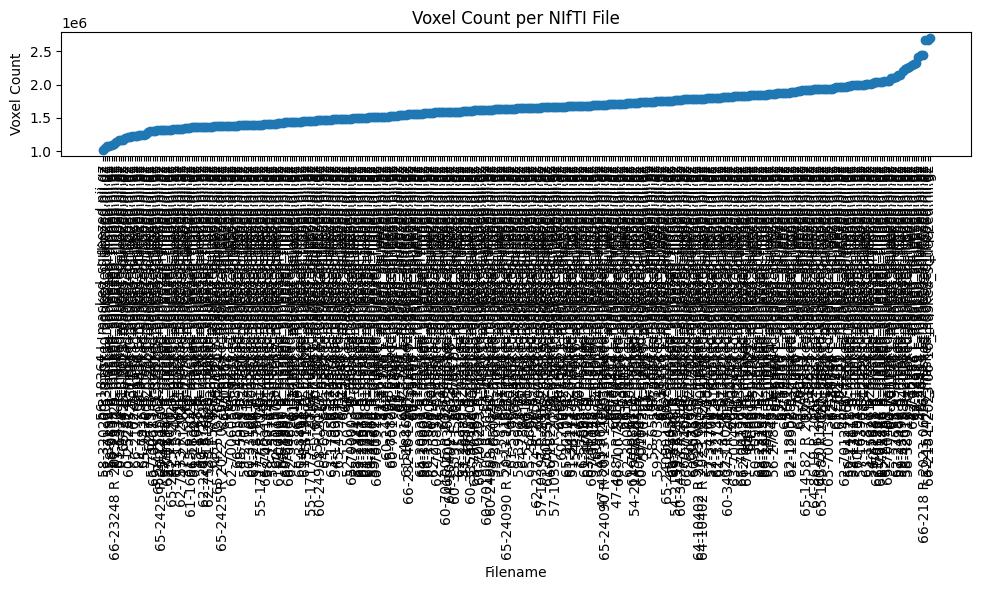

In [5]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by='Infomative voxel')

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['Filename'], df_sorted['Infomative voxel'])
plt.xticks(rotation=90)
plt.xlabel('Filename')
plt.ylabel('Voxel Count')
plt.title('Voxel Count per NIfTI File')
plt.tight_layout()
plt.show()